13. This question should be answered using the `Weekly` data set, which is part of the `ISLR2` package. 
This data is similar in nature to the `Smarket` data from this chapter's lab, except that it contains 1089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.


In [1]:
library(ISLR2)
library(ggplot2)
library(GGally)
library(patchwork)
library(ggthemes)
library(caret)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: lattice



In [2]:
# Define a color cycle to use
colors <- colorblind_pal()(8)
colors

[1] "#000000" "#E69F00" "#56B4E9" "#009E73" "#F0E442" "#0072B2" "#D55E00"
[8] "#CC79A7"

(a) Produce some numerical and graphical summaries of the `Weekly` data. Do there appear to be any patterns?

In [3]:
str(Weekly)

'data.frame':	1089 obs. of  9 variables:
 $ Year     : num  1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 ...
 $ Lag1     : num  0.816 -0.27 -2.576 3.514 0.712 ...
 $ Lag2     : num  1.572 0.816 -0.27 -2.576 3.514 ...
 $ Lag3     : num  -3.936 1.572 0.816 -0.27 -2.576 ...
 $ Lag4     : num  -0.229 -3.936 1.572 0.816 -0.27 ...
 $ Lag5     : num  -3.484 -0.229 -3.936 1.572 0.816 ...
 $ Volume   : num  0.155 0.149 0.16 0.162 0.154 ...
 $ Today    : num  -0.27 -2.576 3.514 0.712 1.178 ...
 $ Direction: Factor w/ 2 levels "Down","Up": 1 1 2 2 2 1 2 2 2 1 ...


In [4]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

In [179]:
data.frame("Number of NAs" = colSums(is.na(Weekly)))

,Number.of.NAs
,<dbl>
Year,0
Lag1,0
Lag2,0
Lag3,0
Lag4,0
Lag5,0
Volume,0
Today,0
Direction,0


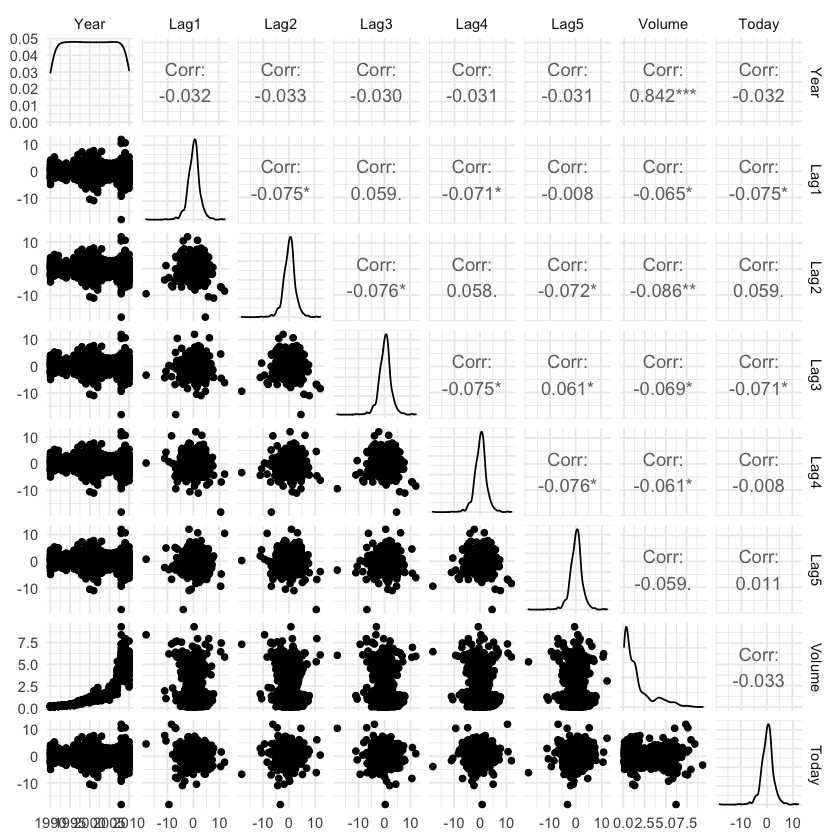

In [6]:
ggpairs(Weekly[, -ncol(Weekly)]) + theme_minimal()

The `Volume` has a high correlation with the `Year`:

`geom_smooth()` using formula 'y ~ x'



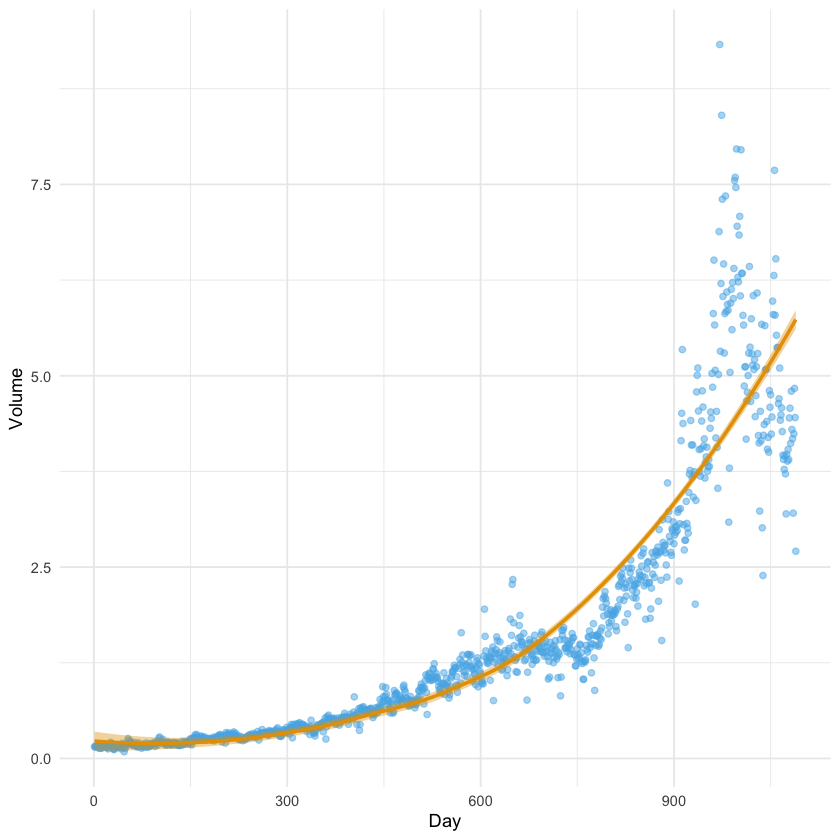

In [7]:
ggplot(Weekly, aes(x = seq(nrow(Weekly)), y = Volume)) +
    geom_point(colour = colors[3], alpha = 0.5) +
    geom_smooth(
        method = "loess",
        span = 1.0,
        colour = colors[2],
        fill = colors[2]
    ) +
    xlab("Day") +
    theme_minimal()

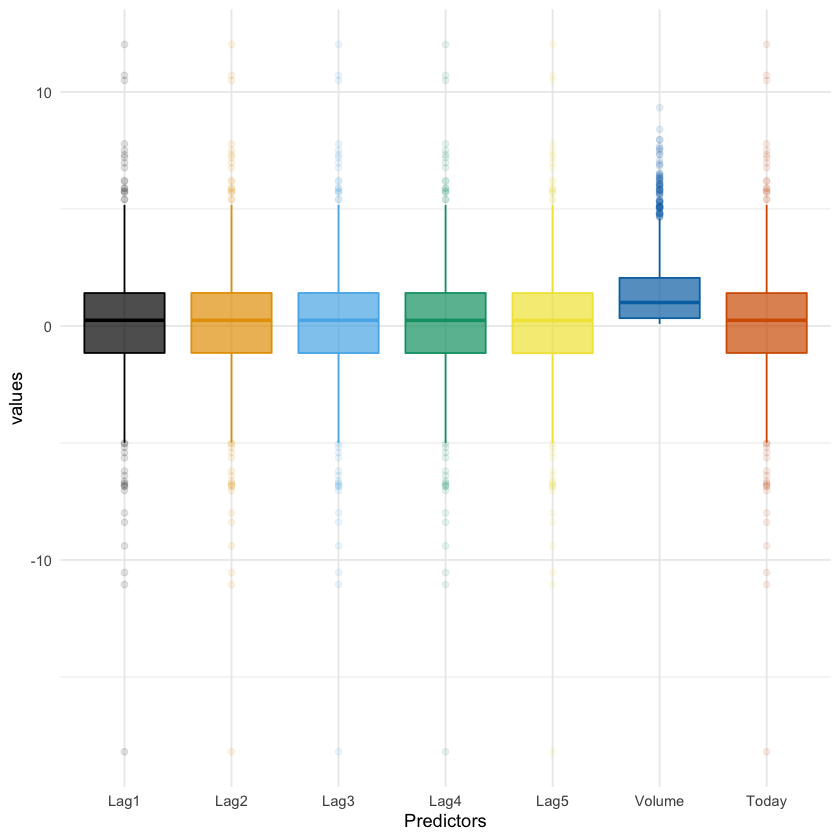

In [8]:
ggplot(stack(Weekly[, c(-1, -9)]), aes(x = ind, y = values)) +
    geom_boxplot(
        colour = colors[1:7],
        fill = colors[1:7],
        alpha = 0.7,
        outlier.alpha = 0.1
        ) +
    xlab("Predictors") +
    theme_minimal()

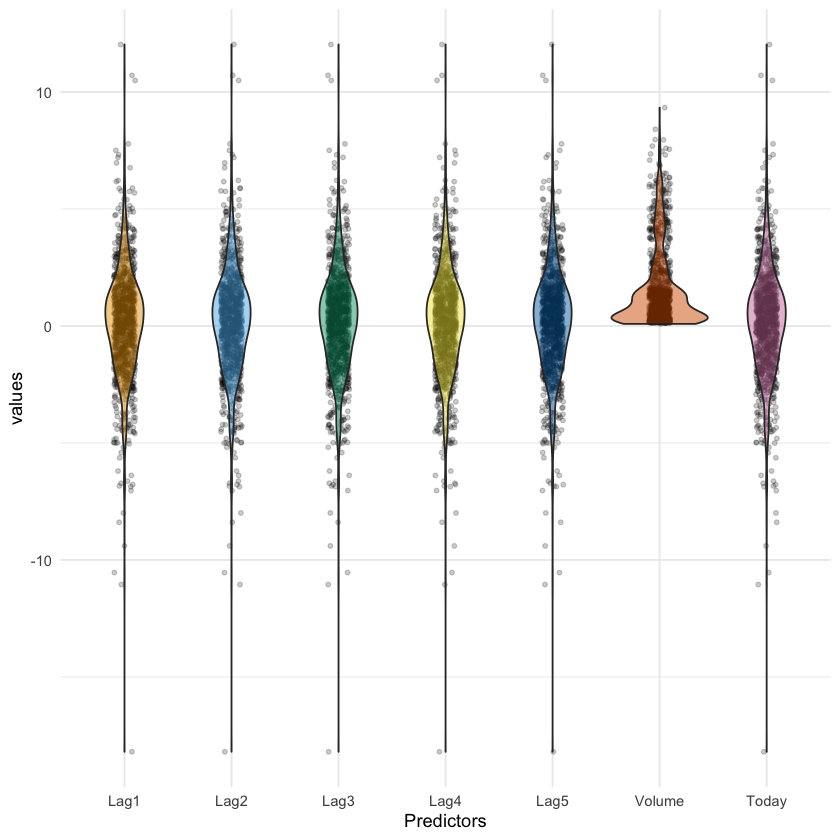

In [21]:
ggplot(stack(Weekly[, c(-1, -9)]), aes(x = ind, y = values, fill = ind)) +
    geom_jitter(
        height = 0,
        width = 0.1,
        alpha = 0.2,
        size = 1.0,
        colour = colors[1],
        show.legend = FALSE) +
    geom_violin(alpha = 0.5, show.legend = FALSE) +
    scale_colour_manual(values = colors[2:8]) +
    scale_fill_manual(values = colors[2:8]) +
    xlab("Predictors") +
    theme_minimal()

(b) Use the full data set to perform a logistic regression with `Direction` as the response and the five lag variables plus `Volume` as predictors.
Use the `summary` function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [10]:
model_fit <- glm(
    Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume,
    data = Weekly,
    family = "binomial"
)

summary(model_fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = "binomial", data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


Taken an $\alpha = 5\%$ and according to the $p$-values from the fitted logistic regression model, the only statistically significant predictor is `Lag2`.

In [41]:
summary(model_fit)$coef

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),0.26686414,0.08592961,3.1056134,0.001898848
Lag1,-0.04126894,0.02641026,-1.5626099,0.118144368
Lag2,0.05844168,0.02686499,2.1753839,0.029601361
Lag3,-0.01606114,0.02666299,-0.6023760,0.546923890
Lag4,-0.02779021,0.02646332,-1.0501409,0.293653342
Lag5,-0.01447206,0.02638478,-0.5485006,0.583348244
Volume,-0.02274153,0.03689812,-0.6163330,0.537674762


(c) Compute the confusion matrix and overall fraction of correct predictions. 
Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

Assuming that the cut-off probability for "Down"-"Up" distinction is 0.5.

The `predict()` function can be used to predict the probability that the market will go up, given values of the predictors. 
The `type = "response"` option tells `R` to output probabilities of the form `P(Y = 1|X)`, as opposed to other information such as the `logit`. 
If no data set is supplied to the `predict()` function, then the probabilities are computed for the training data that was used to fit the logistic regression model. 
Here, we have printed only the first ten probabilities. 
We know that these values correspond to the probability of the market going up, rather than down, because the `contrasts()` function indicates that `R` has created a dummy variable with a 1 for `Up`.

In [40]:
contrasts(Weekly$Direction)

,Up
Down,0
Up,1


In [39]:
model_probs <- predict(model_fit, type = "response")
model_pred <- rep("Down", nrow(Weekly))
model_pred[model_probs > 0.5] <- "Up"

In [47]:
table(model_pred, Weekly$Direction)

          
model_pred Down  Up
      Down   54  48
      Up    430 557


In [128]:
?factor

Warning message in seq_len(head.end.idx):
“first element used of 'length.out' argument”
ERROR while rich displaying an object: Error in seq_len(head.end.idx): argument must be coercible to non-negative integer

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_conte

factor                  package:base                   R Documentation

_F_a_c_t_o_r_s

_D_e_s_c_r_i_p_t_i_o_n:

     The function ‘factor’ is used to encode a vector as a factor (the
     terms ‘category’ and ‘enumerated type’ are also used for factors).
     If argument ‘ordered’ is ‘TRUE’, the factor levels are assumed to
     be ordered.  For compatibility with S there is also a function
     ‘ordered’.

     ‘is.factor’, ‘is.ordered’, ‘as.factor’ and ‘as.ordered’ are the
     membership and coercion functions for these classes.

_U_s_a_g_e:

     factor(x = character(), levels, labels = levels,
            exclude = NA, ordered = is.ordered(x), nmax = NA)
     
     ordered(x, ...)
     
     is.factor(x)
     is.ordered(x)
     
     as.factor(x)
     as.ordered(x)
     
     addNA(x, ifany = FALSE)
     
_A_r_g_u_m_e_n_t_s:

       x: a vector of data, usually taking a small number of distinct
          values.

  levels: an optional vector of the

In [134]:
model_confmat <- confusionMatrix(
    factor(model_pred, levels = c("Up", "Down")),
    factor(Weekly$Direction, levels = c("Up", "Down"))
)

model_confmat

Confusion Matrix and Statistics

          Reference
Prediction  Up Down
      Up   557  430
      Down  48   54
                                         
               Accuracy : 0.5611         
                 95% CI : (0.531, 0.5908)
    No Information Rate : 0.5556         
    P-Value [Acc > NIR] : 0.369          
                                         
                  Kappa : 0.035          
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.9207         
            Specificity : 0.1116         
         Pos Pred Value : 0.5643         
         Neg Pred Value : 0.5294         
             Prevalence : 0.5556         
         Detection Rate : 0.5115         
   Detection Prevalence : 0.9063         
      Balanced Accuracy : 0.5161         
                                         
       'Positive' Class : Up             
                                         

integer(0)

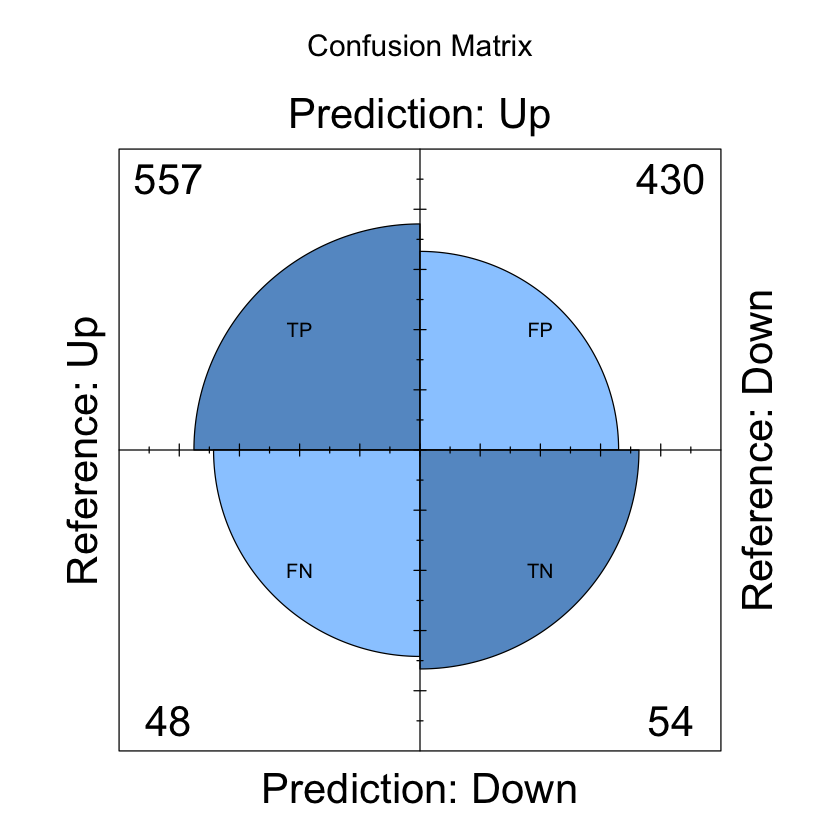

In [138]:
fourfoldplot(
    model_confmat$table,
    conf.level = 0,
    margin = 1,
    main = "Confusion Matrix"
)
text(-0.4, 0.4, "TP", cex = 1) +
text(0.4, -0.4, "TN", cex = 1) +
text(0.4, 0.4, "FP", cex = 1) +
text(-0.4, -0.4, "FN", cex = 1)

In [143]:
data.frame(model_confmat$table)

Prediction,Reference,Freq
<fct>,<fct>,<int>
Up,Up,557
Down,Up,48
Up,Down,430
Down,Down,54


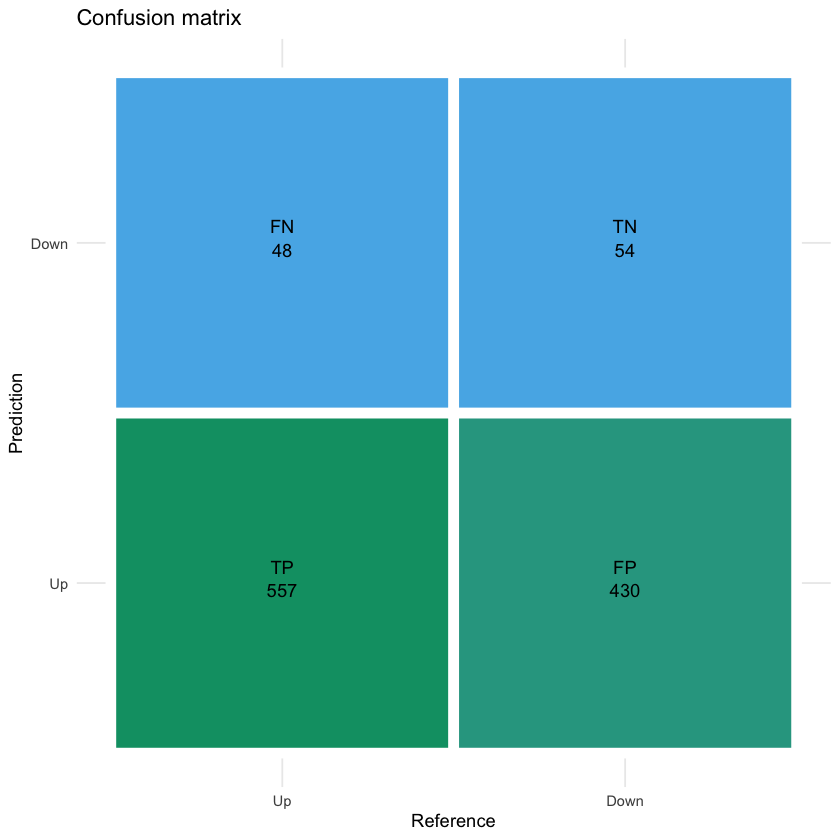

In [157]:

ggplot(
    data = data.frame(model_confmat$table),
    mapping = aes(x = Reference, y = Prediction, fill = Freq),
    title = "Confusion Matrix") +
    geom_tile(aes(fill = Freq), colour = "white", lwd = 3.0,
            linetype = 1) +
    geom_text(aes(label = sprintf("%1.0f", Freq)), vjust = 1) +
    geom_text(aes(label = c("TP", "FN", "FP", "TN")), vjust = -0.75) +
    scale_fill_gradient(low = colors[3], high = colors[4]) +
    theme_minimal() +
    labs(title = "Confusion matrix") +
    theme(legend.position = "none")

The diagonal elements of the confusion matrix indicate correct predictions, while the off-diagonals represent incorrect predictions. 
Hence our model correctly predicted that the market would go up on 557 days and that it would go down on 54 days, for a total of 557 + 54 = 611 correct predictions.

The `mean()` function can be used to compute the fraction of days for which the prediction was correct. 
In this case, logistic regression correctly predicted the movement of the market 56.1% of the time.

In [127]:
mean(model_pred == Weekly$Direction) # same as in confmat Accuracy

[1] 0.5610652

At first glance, it appears that the logistic regression model is working a little better than random guessing. 
However, this result is misleading because we trained and tested the model on the same set of 1089 observations. 
In other words, 100% − 56.1% = 43.9%, is the *training* error rate. 

The **training error rate is often overly optimistic—it tends to underestimate the test error rate**. 
In order to better assess the accuracy of the logistic regression model in this setting, we can fit the model using part of the data, and then examine how well it predicts the held out data. 
This will yield a more realistic error rate, in the sense that in practice we will be interested in our model's performance not on the data that we used to fit the model, but rather on days in the future for which the market's movements are unknown.

(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with `Lag2` as the only predictor. 
Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [158]:
head(Weekly)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
4,1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
5,1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
6,1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


In [165]:
train <- Weekly$Year < 2008

In [167]:
model_fit_2 <- glm(
    Direction ~ Lag2,
    data = Weekly,
    family = "binomial",
    subset = train
)
summary(model_fit_2)


Call:
glm(formula = Direction ~ Lag2, family = "binomial", data = Weekly, 
    subset = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.395  -1.274   1.028   1.082   1.305  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.22658    0.06621   3.422 0.000621 ***
Lag2         0.04716    0.03230   1.460 0.144293    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1280.6  on 932  degrees of freedom
Residual deviance: 1278.5  on 931  degrees of freedom
AIC: 1282.5

Number of Fisher Scoring iterations: 4


In [175]:
# Get the probabilities of the predictions using the test set
model_probs_2 <- predict(
    model_fit_2,
    data.frame(Lag2 = Weekly$Lag2[!train]),
    type = "response"
)

In [221]:
model_pred_2 <- rep("Down", sum(!train, na.rm = TRUE))
model_pred_2[model_probs_2 > 0.5] <- "Up"
table(model_pred_2, Weekly$Direction[!train])

            
model_pred_2 Down Up
        Down    7  5
        Up     65 79

In [250]:
logreg_accuracy <- mean(
    model_pred_2 == Weekly$Direction[!train]
) # same as in confmat Accuracy
logreg_accuracy

[1] 0.5512821

In [225]:
(79 + 7) / (65 + 79 + 7 + 5)

[1] 0.5512821

(e) Repeat (d) using LDA.

We are going to use the package from `MASS` library instead of the `caret`, since the book done it this way.

In [198]:
library(MASS)


Attaching package: ‘MASS’


The following object is masked from ‘package:patchwork’:

    area


The following object is masked from ‘package:ISLR2’:

    Boston




In [202]:
lda_fit <- lda(
    Direction ~ Lag2,
    data = Weekly,
    family = "binomial",
    subset = train
)
lda_fit

Call:
lda(Direction ~ Lag2, data = Weekly, family = "binomial", subset = train)

Prior probabilities of groups:
     Down        Up 
0.4415863 0.5584137 

Group means:
           Lag2
Down 0.07329612
Up   0.27110173

Coefficients of linear discriminants:
           LD1
Lag2 0.4876669

The `predict()` function returns a list with three elements. 
The first element, `class`, contains LDA’s predictions about the movement of the market. 
The second element, `posterior`, is a matrix whose $k$-th column contains the posterior probability that the corresponding observation belongs to the $k$-th class, computed from (4.15). 
Finally, `x` contains the linear discriminants, described earlier.

Notice that the posterior probability output by the model corresponds to the probability that the market will *decrease* (since it is the first level in the factor variable):

In [206]:
lda_pred <- predict(lda_fit, data.frame(Lag2 = Weekly$Lag2[!train]))
names(lda_pred)

[1] "class"     "posterior" "x"

In [207]:
lda_class <- lda_pred$class
table(lda_class, Weekly$Direction[!train])

         
lda_class Down Up
     Down    6  5
     Up     66 79

In [226]:
(6 + 79) / (66 + 79 + 6 + 5) # Accuracy

[1] 0.5448718

In [252]:
lda_accuracy <- mean(lda_class == Weekly$Direction[!train]) # Accuracy
lda_accuracy

[1] 0.5448718

Applying a 50% threshold to the posterior probabilities allows us to recreate the predictions contained in `lda_pred$class`.

In [228]:
sum(lda_pred$posterior[, 1] >= 0.5)
sum(lda_pred$posterior[, 1] < 0.5)

[1] 11

[1] 145

Notice that the posterior probability output by the model corresponds to the probability that the market will *decrease* (since it is the first level in the factor variable):

(f) Repeat (d) using QDA.

We will also use the QDA from the `MASS` library.

In [229]:
qda_fit <- qda(
    Direction ~ Lag2,
    data = Weekly,
    family = "binomial",
    subset = train
)

qda_fit

Call:
qda(Direction ~ Lag2, data = Weekly, family = "binomial", subset = train)

Prior probabilities of groups:
     Down        Up 
0.4415863 0.5584137 

Group means:
           Lag2
Down 0.07329612
Up   0.27110173

In [239]:
qda_pred <- predict(qda_fit, data.frame(Lag2 = Weekly$Lag2[!train]))
names(qda_pred)

[1] "class"     "posterior"

In [240]:
qda_class <- qda_pred$class
table(qda_class, Weekly$Direction[!train])

         
qda_class Down Up
     Down    0  0
     Up     72 84

In [253]:
qda_accuracy <- mean(qda_class == Weekly$Direction[!train])
qda_accuracy

[1] 0.5384615

(h) Repeat (d) using naive Bayes.

In [242]:
library(e1071)

In [243]:
nb_fit <- naiveBayes(
    Direction ~ Lag2,
    data = Weekly,
    family = "binomial",
    subset = train
)

nb_fit


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace, family = "binomial")

A-priori probabilities:
Y
     Down        Up 
0.4415863 0.5584137 

Conditional probabilities:
      Lag2
Y            [,1]     [,2]
  Down 0.07329612 1.883661
  Up   0.27110173 2.173459


The output contains the estimated mean and standard deviation for each variable in each class. 
For example, the mean for `Lag2` is 0.0732 for `Direction=Down`, and the standard deviation is 1.8836. 
We can easily verify this:

In [245]:
mean(Weekly$Lag2[train][Weekly$Direction[train] == "Down"])
sd(Weekly$Lag2[train][Weekly$Direction[train] == "Down"])

[1] 0.07329612

[1] 1.883661

In [248]:
nb_class <- predict(nb_fit, data.frame(Lag2 = Weekly$Lag2[!train]))
table(nb_class, Weekly$Direction[!train])

        
nb_class Down Up
    Down    0  0
    Up     72 84

In [254]:
nb_accuracy <- mean(nb_class == Weekly$Direction[!train])
nb_accuracy

[1] 0.5384615

(g) Repeat (d) using KNN with K = 1.

In [255]:
library(class)

In [278]:
X_train <- Weekly$Lag2[train]
X_test <- Weekly$Lag2[!train]
y_train <- Weekly$Direction[train]
y_test <- Weekly$Direction[!train]

In [279]:
length(X_test)
length(X_train)
length(y_train)

[1] 156

[1] 933

[1] 933

In [280]:
set.seed(1)
knn_pred <- knn(data.frame(X_train), data.frame(X_test), y_train, k = 1)
table(knn_pred, y_test)

        y_test
knn_pred Down Up
    Down   32 38
    Up     40 46

In [284]:
knn_accuracy <- mean(knn_pred == y_test)
knn_accuracy

[1] 0.5

(i) Which of these methods appears to provide the best results on this data?

In [285]:
data.frame(logreg_accuracy, lda_accuracy, qda_accuracy, nb_accuracy, knn_accuracy)

logreg_accuracy,lda_accuracy,qda_accuracy,nb_accuracy,knn_accuracy
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.5512821,0.5448718,0.5384615,0.5384615,0.5
